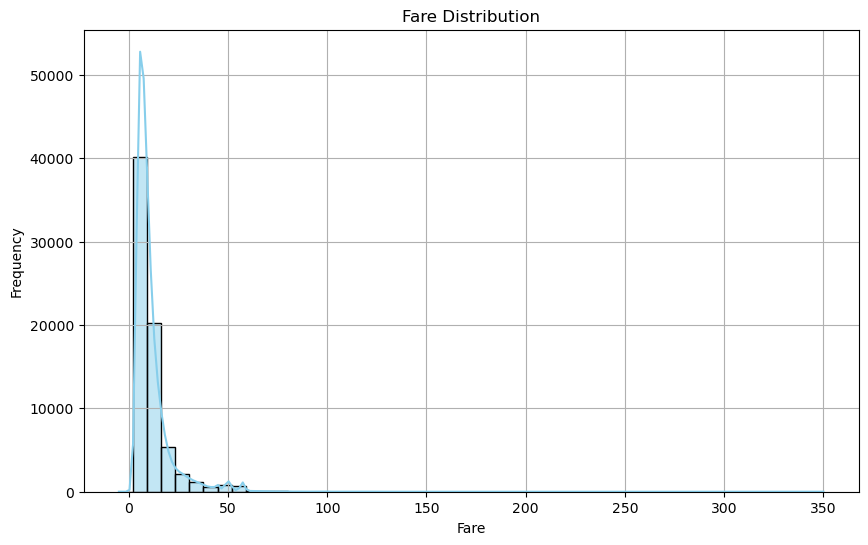

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Load dataset
df = pd.read_csv("uber_enhanced.csv")

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [87]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km

df['distance_km'] = haversine(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
)

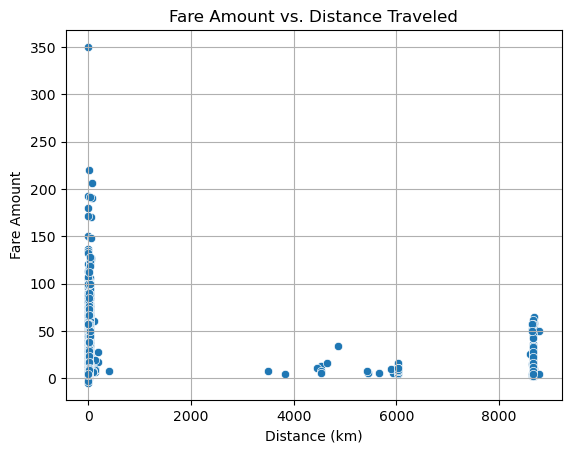

In [88]:
sns.scatterplot(x='distance_km', y='fare_amount', data=df)
plt.title("Fare Amount vs. Distance Traveled")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount")
plt.grid(True)
plt.show()

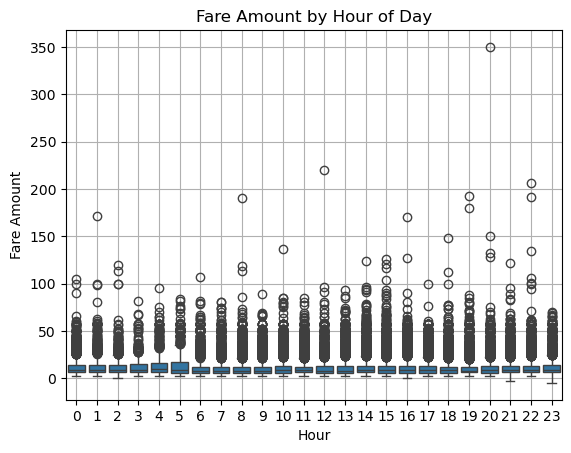

In [89]:
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title("Fare Amount by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fare Amount")
plt.grid(True)
plt.show()

In [90]:
numeric_cols = df.select_dtypes(include=np.number)
corr = numeric_cols.corr()
print(corr['fare_amount'].sort_values(ascending=False))

fare_amount          1.000000
month                0.028168
distance_km          0.027646
dropoff_longitude    0.019682
pickup_longitude     0.016528
passenger_count      0.008810
day                  0.004390
Unnamed: 0           0.004221
hour                -0.009752
pickup_latitude     -0.017915
dropoff_latitude    -0.020017
Name: fare_amount, dtype: float64


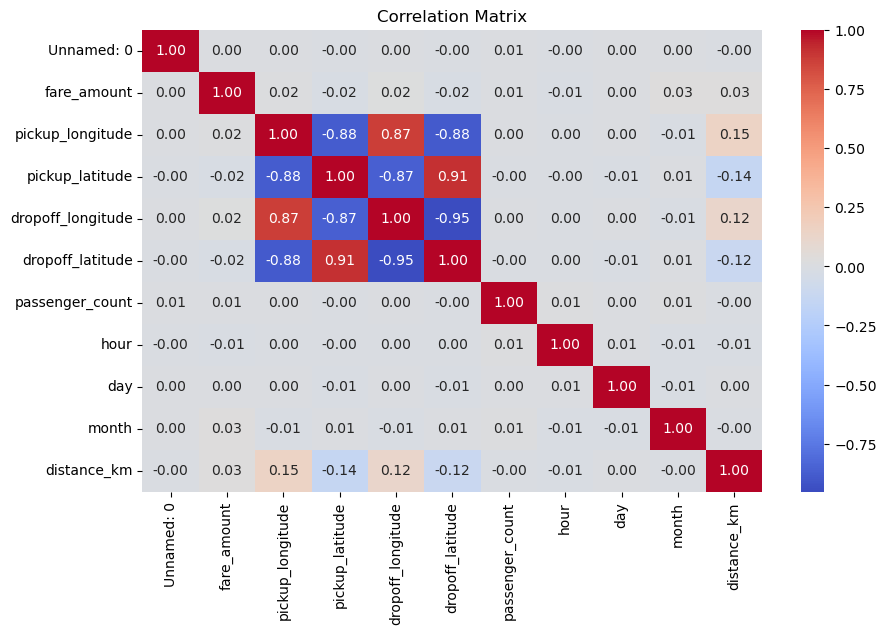

In [91]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [92]:
# Convert pickup_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract hour, day, month, weekday
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.day_name()

# Create peak/off-peak label
def peak_offpeak(hour):
    return 'Peak' if 7 <= hour <= 10 or 16 <= hour <= 19 else 'Off-Peak'

df['peak_offpeak'] = df['hour'].apply(peak_offpeak)

In [93]:
print(df.dtypes)

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
hour                               int32
day                                int32
month                              int32
weekday                           object
peak_offpeak                      object
distance_km                      float64
dtype: object


In [94]:
df.to_csv("uber_enhanced.csv", index=False)